In [24]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [25]:

with open('test_storage2.pkl', 'rb') as f:
    test_storage = pickle.load(f)

In [26]:
batch_attn, batch_tokens_X, batch_tokens_Y = test_storage[0]
batch_tokens_X = batch_tokens_X[:,batch_attn.shape[-1]:]
batch_tokens_Y = batch_tokens_Y[:,batch_attn.shape[-1]:]

In [27]:
meta_path = './data/enwik8_char/meta.pkl'

print(f"Loading meta from {meta_path}...")
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)

itos = meta['itos']
def parse_ascii(a):
    if a == "<eos>": return "\n"
    return chr(int(a))
decode = lambda l: ''.join([parse_ascii(itos[i]) for i in l])

Loading meta from ./data/enwik8_char/meta.pkl...


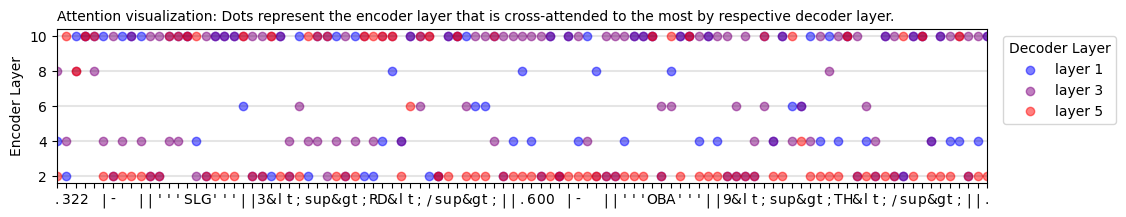

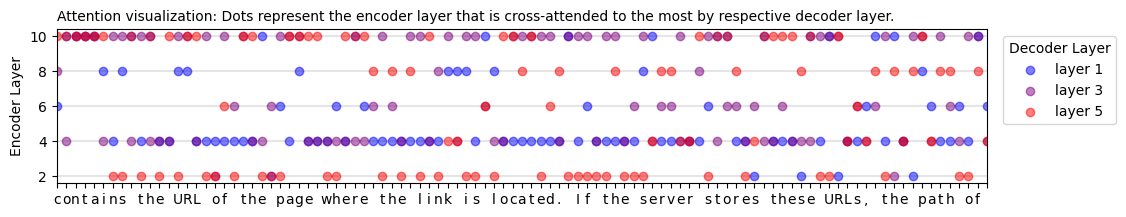

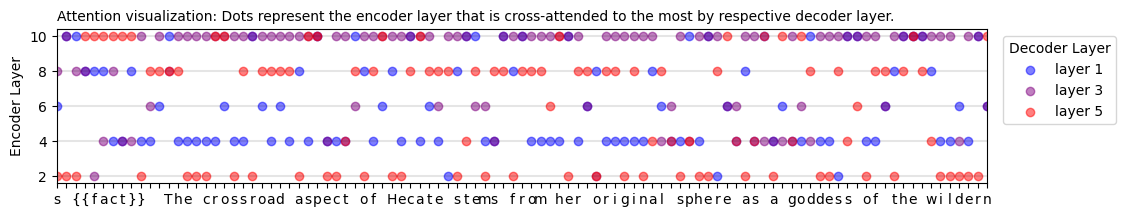

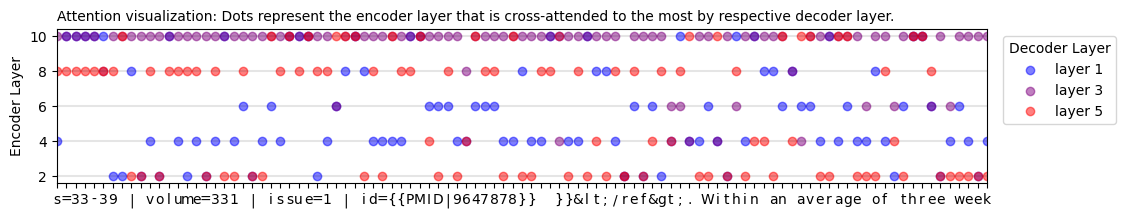

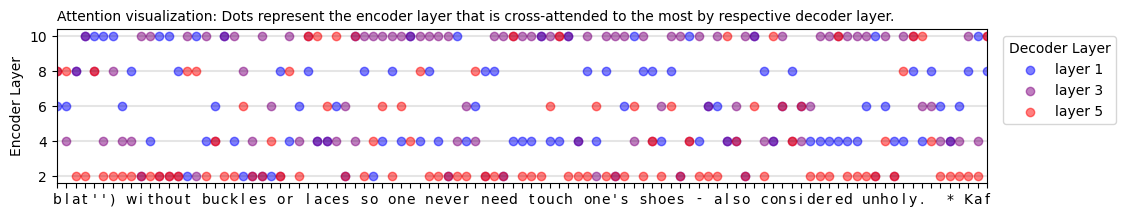

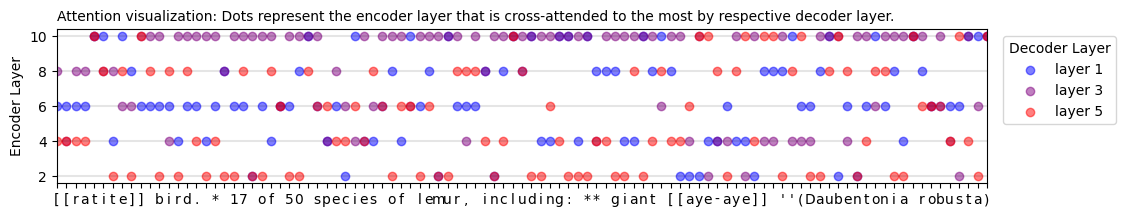

In [28]:
for ix in range(6):
        
    plt.figure(figsize=(12,2))
    plt.scatter(np.arange(batch_attn[0][ix].shape[0]), batch_attn[0][ix], c='blue', alpha=0.5, label='layer 1')
    plt.scatter(np.arange(batch_attn[1][ix].shape[0]), batch_attn[1][ix], c='purple', alpha=0.5, label='layer 3')
    plt.scatter(np.arange(batch_attn[2][ix].shape[0]), batch_attn[2][ix], c='red', alpha=0.5, label='layer 5')
    
    for i, _ in enumerate([2,4,6,8,10]):
        plt.axhline(y=i, color='black', alpha=0.1)
    plt.ylabel("Encoder Layer")
    plt.yticks(ticks=range(len([2,4,6,8,10])), labels=[2,4,6,8,10])
    plt.xticks(np.arange(len(batch_tokens_Y[ix])), [parse_ascii(itos[i]) for i in batch_tokens_Y[ix]])
    
    plt.legend(title='Decoder Layer', bbox_to_anchor=(1.01, 1), loc='upper left')
    
    plt.title("Attention visualization: Dots represent the encoder layer that is cross-attended to the most by respective decoder layer.", fontsize=10, loc='left')
    plt.xlim([0,100])
    plt.show()

In [2]:
import os
import glob
import PyPDF2

def merge_pdfs(paths, output):
    pdf_writer = PyPDF2.PdfWriter()

    for path in paths:
        pdf_reader = PyPDF2.PdfReader(path)
        pdf_writer.add_page(pdf_reader.pages[0])

    with open(output, 'wb') as out:
        pdf_writer.write(out)
        

os.chdir("/home/mk/Desktop/HetznerAzure/")

In [1]:
import os
import glob


os.chdir("/home/mk/Desktop/HetznerMai23-März24/")
import PyPDF2

def merge_pdfs(paths, output):
    pdf_writer = PyPDF2.PdfWriter()

    for path in paths:
        pdf_reader = PyPDF2.PdfReader(path)
        pdf_writer.add_page(pdf_reader.pages[0])

    with open(output, 'wb') as out:
        pdf_writer.write(out)

In [4]:
# List of PDF files to merge
pdf_files = ["Zusammen.pdf", *glob.glob("Hetzner*.pdf"), *glob.glob("*Invoice.pdf")]
output_file = 'RechnungFinal.pdf'

merge_pdfs(pdf_files, output_file)

In [ ]:
os.chdir("/home/mk/Desktop/Boris Azure APril22 bis März24 /")
def merge_pdfs(paths, output):
    pdf_writer = PyPDF2.PdfWriter()

    for path in paths:
        pdf_reader = PyPDF2.PdfReader(path)
        pdf_writer.add_page(pdf_reader.pages[0])

    with open(output, 'wb') as out:
        pdf_writer.write(out)

pdf_files = ["Boris.pdf", *glob.glob("*Invoice.pdf")]
output_file = 'Rechnung Boris.pdf'

merge_pdfs(pdf_files, output_file)